<h1>
<center>
Module 4 - Gothic author identification
</center>
</h1>
<center>
<img src ='https://images-nitrosell-com.akamaized.net/product_images/8/1806/DCD408651.jpg' height='150'>
&nbsp;&nbsp;&nbsp;&nbsp;
<img src='https://images-nitrosell-com.akamaized.net/product_images/8/1806/TS129.jpg' height='150'>
&nbsp;&nbsp;&nbsp;&nbsp;<img src='https://www.thegreatcoursesdaily.com/wp-content/uploads/2017/03/Mary-Shelly-Featured-Image-LARGE.jpg' height='150' >
</center>

This week we are going to take on the task of identifying authors of gothic novels. Our authors to choose from are these three:
<ol>
<li>EAP - Edgar Allen Poe (https://en.wikipedia.org/wiki/Edgar_Allan_Poe): American writer who wrote poetry and short stories that revolved around tales of mystery and the grisly and the grim. Arguably his most famous work is the poem - "The Raven" and he is also widely considered the pioneer of the genre of the detective fiction.</li>
<p>
<li>HPL - HP Lovecraft (https://en.wikipedia.org/wiki/H._P._Lovecraft): Best known for authoring works of horror fiction, the stories that he is most celebrated for revolve around the fictional mythology of the infamous creature "Cthulhu" - a hybrid chimera mix of Octopus head and humanoid body with wings on the back.</li>
<p>
<li>MWS - Mary Shelley (https://en.wikipedia.org/wiki/Mary_Shelley): Seemed to have been involved in a whole panoply of literary pursuits - novelist, dramatist, travel-writer, biographer. She is most celebrated for the classic tale of Frankenstein where the scientist Frankenstein a.k.a "The Modern Prometheus" creates the Monster that comes to be associated with his name.</li>
</ol>
<p>
What we have is a table of sentences from their books. Each sentence is labeled with the author who wrote it. Given a new sentence our job is to predict who the author is of that sentence.
<p>
The sentences are all jumbled up, i.e., we do not have paragraph or chapter level info.
  <p>
This identification problem actually comes from a site called kaggle:  https://www.kaggle.com/c/spooky-author-identification. Do you know about kaggle? It is a very useful site. They hold all kinds of machine learning contests. We will look at another later in the quarter.

<p>
<h2>Why is this interesting?</h2>
<p>
One application of this style of analysis is in literary studies. An ancient book is found but the author is unknown. Or perhaps the author is known but there is a suspicion that someone else ghost wrote it. Or even looking at plagiarism: some portions of a book by author X look like they were lifted from author Y.
<p>
Let's bring in the table and look at it. But first, grab your functions from last week.
</div>

In [0]:
#flush the old directory
!rm -r  'w20_ds_library'

rm: cannot remove 'w20_ds_library': No such file or directory


In [0]:
my_github_name = 'FutureDeus'  #replace with your account name

In [0]:
clone_url = f'https://github.com/{my_github_name}/w20_ds_library.git'

In [0]:
#get the latest.
!git clone $clone_url 


Cloning into 'w20_ds_library'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [0]:
from w20_ds_library import *

###New table

In [0]:
import pandas as pd

gothic_table = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQqRwyE0ceZREKqhuaOw8uQguTG6Alr5kocggvAnczrWaimXE8ncR--GC0o_PyVDlb-R6Z60v-XaWm9/pub?output=csv',
                          encoding='utf-8')

In [0]:
pd.set_option('display.max_colwidth', -1)  #force all of sentence to be shown

In [0]:
gothic_table.head()


,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


In [0]:
len(gothic_table)

19579

# Challenge 1

Do some wrangling. We need the author column changed to label. We need the values in the author column changed to integers. Use 0 for EAP, 1 for MWS and 2 for HPL.

In [0]:
#your wrangling code here
def author_to_label(x):
  if x == 'EAP':
    return(0)
  elif x == 'MWS':
    return(1)
  elif x == 'HPL':
    return(2)
  else:
    return (3)  ##Should not happen

gothic_table['label'] = gothic_table.apply(lambda x: author_to_label(x['author']), axis = 1)
gothic_table = gothic_table.drop(columns=['author'])



In [0]:
gothic_table.head()

,id,text,label
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",0
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,2
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",0
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",1
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",2


<h2>
Let's devise a plan
</h2>


This looks similar to our tweet problem in prior week. We are given some text. The text has a label. Our goal is to build a model that will predict the label using the content of the text.

<ul>
<li>Instead of using a bag of characters, let's use a bag of words.
<p>
<li>Naive Bayes was what we used on tweet problem so let's try it again here.
<p>
<li>I want to do a bit of wrangling of the text in a sentence, more than we did for the tweets.
</ul>

I'll tackle the wrangling first.


<h2>
Wrangling a sentence into words
</h2>
<div class=h1_cell>
<p>
Once we start dealing with English, the complexity goes up a notch. One problem is that we will find words with apostrophes. For example, contractions like "I'll go", "it's easy", "won't quit". Or possesives like "John's game", "Tess' party".
<p>
A second problem is that we typically want to remove words that are so common they are useless in differentiating.
Let's start with this second problem first. We will start to use the nltk package this week. nltk is like pandas in that it has lots of functions, but now for doing a wide array of NLP (Natural Language Processing) tasks. For now, I know that nltk has a built-in set of words that are very common. They are called "stop words" (https://en.wikipedia.org/wiki/Stop_words). The general idea is that we want to delete these words from a sentence before doing any analysis. If you want an analogy, it would be like removing common charaters from last week. For instance, the letters 'a' and 'e' are common. We could ignore them by leaving them out of the intersection set, e.g.,
<pre>
set(tweet0).intersection(set('bcdfghijklmnopqrstuvwxyz!#'))
</pre>

Let's get the stop words defined by nltk. Please note that this set is subjective. There is no universeral agreement on what should be a stopword. We are using what nltk defines. But there are compeititors. And seems clearly context-dependent.
</div>

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
swords = stopwords.words('english')
swords.sort()
swords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

I'm going to give you a function that strips out the stop words and returns a list of "clean" words. I am using the re package. It is one that is quite powerful and you likely will want to learn if you continue to work with text data.

In [0]:
import re
def get_clean_words(stopwords:list, raw_sentence:str) -> list:
  assert isinstance(stopwords, list), f'stopwords must be a list but saw a {type(stopwords)}'
  assert all([isinstance(word, str) for word in stopwords]), f'expecting stopwords to be a list of strings'
  assert isinstance(raw_sentence, str), f'raw_sentence must be a str but saw a {type(raw_sentence)}'

  sentence = raw_sentence.lower()
  for word in stopwords:
    sentence = re.sub(r"\b"+word+r"\b", '', sentence)  #replace stopword with empty

  cleaned = re.findall("\w+", sentence)  #now find the words
  return cleaned

In [0]:
test_sentence = "I'll say it's 6 o'clock!"


In [0]:
get_clean_words(swords,test_sentence)

['say', '6', 'clock']

Let's try it on first 5 sentences.

In [0]:
for i in range(5):
    text = gothic_table.loc[i, 'text']
    print(text)
    print(' '.join(get_clean_words(swords, text)))
    print('='*10)

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
process however afforded means ascertaining dimensions dungeon might make circuit return point whence set without aware fact perfectly uniform seemed wall
It never once occurred to me that the fumbling might be a mere mistake.
never occurred fumbling might mere mistake
In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.
left hand gold snuff box capered hill cutting manner fantastic steps took snuff incessantly air greatest possible self satisfaction
How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as 

<h1>
Challenge 2
</h1>

Divide the large table into a training table and a test table. First, shuffle the table. Then produce a test table of first 6526 and training table of the rest.

In [0]:
import numpy as np
rsgen = np.random.RandomState(1234)  #use this so we get same values

In [0]:
#fill in the code
shuffled_table = gothic_table.sample(n=len(gothic_table), random_state=rsgen)

testing_table = shuffled_table[:6526]
training_table = shuffled_table[6526:]

testing_table = testing_table.reset_index(drop=True)
training_table = training_table.reset_index(drop=True)


In [0]:
testing_table.head()

,id,text,label
0,id18824,"An indefinite sense of awe, which at first sight of the navigators of the ship had taken hold of my mind, was perhaps the principle of my concealment.",0
1,id27368,"Surely, man had never before so terribly altered, in so brief a period, as had Roderick Usher It was with difficulty that I could bring myself to admit the identity of the wan being before me with the companion of my early boyhood.",0
2,id06142,"Why don't you laugh at Oliver's grandfather, who won't ride in a motor?",2
3,id25016,"I lay upon the grass surrounded by a darkness which not the slightest beam of light penetrated There was no sound for the deep night had laid to sleep the insects, the only creatures that lived on the lone spot where no tree or shrub could afford shelter to aught else There was a wondrous silence in the air that calmed my senses yet which enlivened my soul, my mind hurried from image to image and seemed to grasp an eternity.",1
4,id09465,"She stood erect in a singularly fragile canoe, and urged it with the mere phantom of an oar.",0


In [0]:
training_table.head()

,id,text,label
0,id22530,Ellison was remarkable in the continuous profusion of good gifts lavished upon him by fortune.,0
1,id20315,"Of his mind I say nothing, of course.",0
2,id27104,"""My best girl,"" he had said, ""relieves me from these phantasies.",1
3,id12917,The Prefect was fond of the cant of diplomacy.,0
4,id04573,"When I say that Dr. West was avid to serve in battle, I do not mean to imply that he was either naturally warlike or anxious for the safety of civilisation.",2


<h1>
Challenge 3

</h1>

Use the training table to build the word bag. In particular, fill out `build_word_bag` below to produce the bag of words. The bag will hold all unique words seen across all the sentences in the table passed. Use get_clean_words before adding words to the bag.

Remember that we now have 3 predicted values. So you will need to follow each word with a list of 3 numbers. Make the first number in list a count of EAP, the second number a count of MWS and the third number the count of HPL.


##Important point!

If a word appears more than once in a sentence, only count it as occuring once. In essence we are saying that the word is a "feature" of the sentence and once you recognize it, you are done. You don't keep recognizing it in that sentence.

Hint: think about using sets.

In [0]:
def build_word_bag(stopwords:list, training_table:dframe) -> dict:
  assert isinstance(stopwords, list), f'stopwords must be a list but saw a {type(stopwords)}'
  assert all([isinstance(word, str) for word in stopwords]), f'expecting stopwords to be a list of strings'
  assert isinstance(training_table, pd.core.frame.DataFrame), f'training_table not a dataframe but instead a {type(training_table)}'

  #your code here
  word_bag = {}  #initialisation

  for index, row in training_table.iterrows():
    for clean_word in list(dict.fromkeys(get_clean_words(stopwords, row['text']))):
      if clean_word in word_bag:
        word_bag[clean_word][row['label']] += 1
      else:
        template = [0, 0, 0]
        template[row['label']] += 1
        word_bag[clean_word] = template
  return word_bag


Test on first 10 sentences. My results:

<img src='https://www.dropbox.com/s/w2x39axh26w2383/Screenshot%202020-01-20%2011.00.24.png?raw=1'>

In [0]:
bag_of_words_10 = build_word_bag(swords, training_table[:10])
len(bag_of_words_10)  #73 unique words

73

In [0]:
sorted(list(bag_of_words_10.items())[:30])


[('avid', [0, 0, 1]),
 ('battle', [0, 0, 1]),
 ('best', [0, 1, 0]),
 ('cant', [1, 0, 0]),
 ('continuous', [1, 0, 0]),
 ('course', [1, 0, 0]),
 ('diplomacy', [1, 0, 0]),
 ('dr', [0, 0, 1]),
 ('either', [0, 0, 1]),
 ('ellison', [1, 0, 0]),
 ('fond', [1, 0, 0]),
 ('fortune', [1, 0, 0]),
 ('gifts', [1, 0, 0]),
 ('girl', [0, 1, 0]),
 ('good', [1, 0, 0]),
 ('imply', [0, 0, 1]),
 ('lavished', [1, 0, 0]),
 ('mean', [0, 0, 1]),
 ('mind', [1, 0, 0]),
 ('nothing', [1, 0, 0]),
 ('phantasies', [0, 1, 0]),
 ('prefect', [1, 0, 0]),
 ('profusion', [1, 0, 0]),
 ('relieves', [0, 1, 0]),
 ('remarkable', [1, 0, 0]),
 ('said', [0, 1, 0]),
 ('say', [1, 0, 1]),
 ('serve', [0, 0, 1]),
 ('upon', [1, 0, 0]),
 ('west', [0, 0, 1])]

Now use entire training table to produce word_bag. My results for last 30:

<img src='https://www.dropbox.com/s/xqa7bymje46npj3/Screenshot%202020-01-20%2011.07.03.png?raw=1'>

In [0]:
bag_of_words = build_word_bag(swords, training_table)
len(bag_of_words)  #21254 unique words

21254

In [0]:
sorted(list(bag_of_words.items()))[-30:]

[('zette', [1, 0, 0]),
 ('zide', [1, 0, 0]),
 ('zigzag', [1, 0, 0]),
 ('zigzagging', [0, 0, 2]),
 ('zimmer', [0, 0, 3]),
 ('zimmerman', [0, 0, 1]),
 ('zircon', [0, 0, 1]),
 ('zit', [2, 0, 0]),
 ('zobnarian', [0, 0, 1]),
 ('zodiac', [1, 0, 0]),
 ('zodiacal', [1, 0, 0]),
 ('zokkar', [0, 0, 3]),
 ('zone', [0, 0, 1]),
 ('zones', [1, 0, 0]),
 ('zopyrus', [1, 0, 0]),
 ('zorry', [1, 0, 0]),
 ('zubmizzion', [1, 0, 0]),
 ('à', [5, 0, 0]),
 ('ångstrom', [0, 0, 1]),
 ('ædile', [0, 0, 1]),
 ('ægyptus', [0, 0, 1]),
 ('æmilianus', [0, 0, 1]),
 ('æneid', [0, 0, 1]),
 ('æronaut', [1, 0, 0]),
 ('æronauts', [1, 0, 0]),
 ('ærostation', [1, 0, 0]),
 ('æschylus', [1, 0, 0]),
 ('élite', [1, 0, 0]),
 ('οἶδα', [0, 0, 1]),
 ('υπνος', [0, 0, 1])]

We now have a word bag that will hold the "evidence". What are we missing? We are missing `P(O)`: the total count of the sentences for each author.


In [0]:
the_counts = training_table['label'].value_counts()

In [0]:
type(the_counts)

pandas.core.series.Series

In [0]:
the_counts

0    5307
1    4023
2    3723
Name: label, dtype: int64

Given we have a series, we can treat it like a dictionary, right?

In [0]:
the_counts[0]  #5307 for EAP

5307

##Ok, ready to try naive_bayes

Let's use row 2.

In [0]:
#You may want to paste your bayes function in this cell. You will need to use it as a base to make changes.



In [0]:
evidence = set(get_clean_words(swords,testing_table.loc[2,'text']))  #look at clean words from first row in testing_table
evidence

{'grandfather', 'laugh', 'motor', 'oliver', 'ride'}

In [0]:
bayes(evidence, bag_of_words, training_table)  #you should get an error - see below

KeyError: ignored

You should get this error:
<pre>
KeyError: 'oliver'
</pre>

##Uh, we have a problem

We actually have mutiple problems caused by us stepping up in complexity. When working with just the 28 chars, these problems did not surface. Now they are. This is the first, which I'll explain in a minute. But in general, we need to beef up our bayes function to make it more robust.

Can you guess what the problem is?

The problem of the KeyError is that we are seeing a word from a sentence in the testing table that did not appear in a sentence in the training table, i.e., 'oliver'. So we don't have an entry for it in bag_of_words. We are going to have to figure out how to deal with it.


# Challenge 4

There is a way to deal with our problem. It is called a Laplace smoothing factor. In essence, what Laplace said is that it is arrogant of us to say that something has 0 probability of occurring (see his short bio at end). So we add a smoothing factor to each P(Ei|O) computation. Kind of an anti-arrogance factor. Here is the general form.

<img src='https://www.dropbox.com/s/upkcxj3d8m2ap0a/Screenshot%202020-01-04%2010.49.53.png?raw=1'>

I am going to treat a missing word in the bag the same as a 0 count. Go ahead and define a new function robust_bayes that does this and uses the Laplace smoothing factor as shown. I copied my bayes function in and then modified it.

In [0]:
def robust_bayes(evidence:set, evidence_bag:dict, training_table:dframe, laplace:float=1.0) -> tuple:
  assert isinstance(evidence, set), f'evidence not a set but instead a {type(evidence)}'
  assert isinstance(evidence_bag, dict), f'evidence_bag not a dict but instead a {type(evidence_bag)}'
  assert isinstance(training_table, pd.core.frame.DataFrame), f'training_table not a dataframe but instead a {type(training_table)}'
  assert 'label' in training_table, f'label column is not found in training_table'
  assert training_table.label.dtype == int, f"label must be an int column (possibly wrangled); instead it has type({training_table.label.dtype})"
  assert isinstance(laplace, float), f'laplace not a float but instead a {type(laplace)}'

  #your code here
  label_list = training_table['label'].tolist()

  variation = max(label_list)+1
  v_list = [0 for i in range(variation)]
  
  count = [label_list.count(i) for i in range(variation)]
  p_count = [j/len(training_table) for j in count]

  V = len(evidence_bag)

  return tuple(np.multiply(np.prod([np.divide(evidence_bag.get(key, v_list)[i] + laplace, count[i] + V + laplace) for key in evidence]), p_count[i]) for i in range(variation))


Try with row 2 again. Gave us an error before.

In [0]:
robust_bayes(evidence, bag_of_words, training_table)  #(9.224782654574275e-22, 1.4333999480117428e-21, 5.632427633807786e-20)

(9.224782654574275e-22, 1.433399948011743e-21, 5.632427633807787e-20)

Our prediction would be 2 or HPL.

In [0]:
testing_table.loc[2,'label']  #2

2

Got it right, hurray.

##One more note about Laplace smoothing

The problem we are really solving is one of a 0 entry in the word bag. So even if we do not get a key error, i.e., we have seen the word before, we still smooth. What this means is that we never are dealing with a 0 probability. Take this entry in bag_of_words:
<pre>
('avid', [0, 0, 5]),
</pre>
Without smoothing, P(avid|EAP) would be 0. This is what Laplace did not like. He would say "*come on, you are sure you have seen everything ever written by EAP? And he never uses avid? Baloney. I don't trust 0s*."

# Challenge 5

There is one more problem that is kind of hidden under the surface. If our set of words is long, there is the possibility of underflowing on a Python float. And when that happens, we get a 0 (instead of a very small positive number).

I'd like you to catch this underflow. It will occur when computing the numerator.
<pre>
P(E0|O) * P(E1|O) * P(E2|O) ... * P(O)
</pre>
 I hope you agree that the numerator should never be 0 given we are doing Laplace smoothing. But it can if we underflow. Check this out. It is row 191 from the tesing table.


In [0]:
evidence = set(get_clean_words(swords, testing_table.loc[191, 'text']))
evidence

{'absorbed',
 'advising',
 'affair',
 'article',
 'assured',
 'avoided',
 'awful',
 'beautiful',
 'bosom',
 'break',
 'buckingham',
 'bullet',
 'burning',
 'came',
 'certainly',
 'chivalry',
 'composing',
 'composition',
 'consuming',
 'contempt',
 'convincing',
 'copy',
 'criticism',
 'darkly',
 'day',
 'deaf',
 'decidedly',
 'delicacy',
 'determination',
 'ear',
 'editor',
 'emblem',
 'entreaties',
 'enunciated',
 'especial',
 'eternity',
 'everything',
 'exquisite',
 'extent',
 'follows',
 'foreman',
 'fulfilment',
 'gazette',
 'go',
 'gratification',
 'great',
 'head',
 'high',
 'ho',
 'honor',
 'humble',
 'hyper',
 'indeed',
 'independent',
 'inspires',
 'intending',
 'intimated',
 'john',
 'l',
 'leading',
 'master',
 'merely',
 'midnight',
 'morning',
 'much',
 'next',
 'obedient',
 'offensive',
 'oil',
 'opportunity',
 'paper',
 'paragraph',
 'pot',
 'press',
 'rather',
 'really',
 'reference',
 'regards',
 'requesting',
 'resolute',
 'sat',
 'say',
 'servant',
 'shall',
 'show

A long list of words. My theory is that long lists like this can cause the numerator to underflow. Let's see if I am correct.

In [0]:
robust_bayes(evidence, bag_of_words, training_table)  #(0.0, 0.0, 0.0)

(0.0, 0.0, 0.0)

Yep, we produced 0 probabilities which implies underflow.


If underflow occurs, my heuristic is to set the probability to the smallest float representable by Python. You can google to find what this is. Go ahead and add this to robust_bayes as our final step in strengthening the function. Once you have this in place, you should never see a probabality of 0 appear.

In [0]:
def robust_bayes(evidence:set, evidence_bag:dict, training_table:dframe, laplace:float=1.0) -> tuple:
  assert isinstance(evidence, set), f'evidence not a set but instead a {type(evidence)}'
  assert isinstance(evidence_bag, dict), f'evidence_bag not a dict but instead a {type(evidence_bag)}'
  assert isinstance(training_table, pd.core.frame.DataFrame), f'training_table not a dataframe but instead a {type(training_table)}'
  assert 'label' in training_table, f'label column is not found in training_table'
  assert training_table.label.dtype == int, f"label must be an int column (possibly wrangled); instead it has type({training_table.label.dtype})"
  assert isinstance(laplace, float), f'laplace not a float but instead a {type(laplace)}'

  #your code here
  label_list = training_table['label'].tolist()

  variation = max(label_list)+1
  v_list = [0 for i in range(variation)]
  
  count = [label_list.count(i) for i in range(variation)]
  p_count = [j/len(training_table) for j in count]

  V = len(evidence_bag)

  holder = tuple(np.multiply(np.prod([np.divide(evidence_bag.get(key, v_list)[i] + laplace, count[i] + V + laplace) for key in evidence]), p_count[i]) for i in range(variation))

  return tuple(np.finfo(np.float64).tiny if i == 0 else i for i in holder)

Try it on row 191 again.

In [0]:
robust_bayes(evidence, bag_of_words, training_table)  #(2.2250738585072014e-308, 2.2250738585072014e-308, 2.2250738585072014e-308)

(2.2250738585072014e-308, 2.2250738585072014e-308, 2.2250738585072014e-308)

Just as a heads up, this problem of underflow is not limited to using Bayesian models. It crops up in deep learning with neural nets as well. There it is called the vanishing gradient.

<h2>
Challenge 6
</h2>

We are now ready to get accuracy information by running bayes_tester. But let's define a new function, robust_bayes_tester, that makes a call on robust_bayes.


In [0]:
#your new function here
def robust_bayes_tester(testing_table:dframe, evidence_bag:dict, training_table:dframe, parser:Callable) -> list:
  assert isinstance(testing_table, pd.core.frame.DataFrame), f'test_table not a dataframe but instead a {type(testing_table)}'
  assert isinstance(evidence_bag, dict), f'evidence_bag not a dict but instead a {type(evidence_bag)}'
  assert isinstance(training_table, pd.core.frame.DataFrame), f'training_table not a dataframe but instead a {type(training_table)}'
  assert callable(parser), f'parser not a function but instead a {type(parser)}'
  assert 'label' in training_table, f'label column is not found in training_table'
  assert training_table.label.dtype == int, f"label must be an int column (possibly wrangled); instead it has type({training_table.label.dtype})"
  assert 'text' in testing_table, f'text column is not found in testing_table'

  #your code here
  return [robust_bayes(set(parser(testing_table.loc[i,'text'])) , evidence_bag, training_table) for i in range(len(testing_table)) ]


##Curry a function

Now the interesting part. Here is what we had before for the parser from last week:
<pre>
def char_set_builder(text:str) -> list:
  the28 = set(text).intersection(set('abcdefghijklmnopqrstuvwxyz!#'))
  return list(the28)
</pre>
Notice it only takes one argument, the text column from the row. Unfortunately, get_clean_words is what we want to use now and it takes 2 arguments, the stopwords and the text column from the row. Here are 2 solutions that I am going to rule out:

* Assume the stopwords are global to `robust_bayes_tester`. I don't like globals like this. Makes your code hard to debug and use in different contexts.

* Add stopwords as an argument to `robust_bayes_tester`. This is ok, but can lead to proliferation of arguments.

My solution is to bundle up stopwords in something called a closure. Let me show you how a closure works.

In [0]:
def add_pair(x,y): return x+y  #A normal function of 2 arguments

In [0]:
a = 5
b=6
add_pair(a,b)  #looks good

11

But assume I want a function of 1 argument where I fix the value of x to a constant and just use y as the variable. Reducing the number of arguments of a function like this is called Currying the function.

In [0]:
def curry_x(old_func,x):
  #the body of curry_x is the closure. It contains the value of old_func and x.

  def inner(y): return old_func(x,y)  #define a new function that uses x from closure and passes in y.

  return inner  #will return a function of 1 argument. But that function will carry the closure with it.

In [0]:
func2 = curry_x(add_pair, a)

func2(6)

11

In [0]:
func3 = curry_x(add_pair, 100)
func3(6)

106

Go ahead and use these ideas to curry get_clean_words into a new function, word_list, that accepts 1 argument, the text. Here is what I get:

<img src='https://www.dropbox.com/s/1ix1y6mdu6xxelx/Screenshot%202020-01-20%2011.14.20.png?raw=1'>

In [0]:
#define word_parser here

word_parser = curry_x(get_clean_words, swords)

In [0]:
word_parser(testing_table.loc[0,'text'])

['indefinite',
 'sense',
 'awe',
 'first',
 'sight',
 'navigators',
 'ship',
 'taken',
 'hold',
 'mind',
 'perhaps',
 'principle',
 'concealment']

In [0]:
#test on first row in testing table

robust_bayes_tester(testing_table[:1], bag_of_words, training_table, word_parser)  #[(9.261112002269545e-41, 7.204860058626271e-44, 6.352380208122902e-44)]

[(9.261112002269543e-41, 7.204860058626269e-44, 6.352380208122905e-44)]

Now on entire testing table. My results:

<img src='https://www.dropbox.com/s/uv8ka90gaq2ixtb/Screenshot%202020-01-24%2017.22.41.png?raw=1'>

In [0]:
%%time

prob_list = robust_bayes_tester(testing_table, bag_of_words, training_table, word_parser)  

CPU times: user 14.2 s, sys: 11.9 ms, total: 14.2 s
Wall time: 14.2 s


In [0]:
prob_list[:10]

[(9.261112002269543e-41, 7.204860058626269e-44, 6.352380208122905e-44),
 (6.494537195771628e-59, 8.498110904926212e-62, 2.123457853929427e-63),
 (9.224782654574275e-22, 1.433399948011743e-21, 5.632427633807787e-20),
 (1.8515968789822016e-133, 1.4077753801753683e-128, 1.4140047533281686e-133),
 (4.8122429144770604e-33, 1.0970306771850337e-34, 9.948043553331152e-37),
 (2.4906913167350545e-17, 4.895777522434108e-18, 1.177458996847518e-16),
 (5.853523017972533e-130, 2.1168389237665542e-137, 2.7160316748865018e-136),
 (1.0314647795433375e-44, 6.007131975215121e-49, 2.7263714260321954e-48),
 (3.7624383030599735e-17, 6.963934747423715e-19, 5.271952265244089e-18),
 (4.0823072500929544e-23, 1.2330880041731688e-19, 3.1005636946455704e-23)]

#Challenge 7

Finally, compute accuracy.  You will need a means to break ties. As reminder, here are the counts for EAP (0), MWS (1) and HPL (2):
<pre>
0    5307
1    4023
2    3723
</pre>
So, we know robust_tester gives us a list of 3 floats. There can be a tie for the largest float. I am going to break ties based on the number of sentences for each author (see counts above).
* If EAP is among the largest, predict EAP.
* If MWS is among the largest and EAP is not, predict MWS.
* If HPL is the sole largest, predict HPL.

First, initialize the confusion matrix. As you can see it is now a 3x3 matrix as opposed to 2x2.
<pre>
{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0}
 </pre>

In [0]:
#your code here

cm = {(0, 0): 0,
      (0, 1): 0,
      (0, 2): 0,
      (1, 0): 0,
      (1, 1): 0,
      (1, 2): 0,
      (2, 0): 0,
      (2, 1): 0,
      (2, 2): 0}    #initialisation


In [0]:
actuals = testing_table.label.to_list()  #you need the actual labels

Now fill out the cm. Here is what I get:
<pre>
{(0, 0): 2257,
 (0, 1): 274,
 (0, 2): 268,
 (1, 0): 194,
 (1, 1): 1650,
 (1, 2): 114,
 (2, 0): 142,
 (2, 1): 97,
 (2, 2): 1530}
 </pre>

In [0]:
#your code here
index = 0
for i in prob_list:
  if (i[0] >= i [1]) & (i[0] >= i[2]):
    node = (0, actuals[index])
  elif (i[1] > i[0]) & (i[1] >= i[2]):
    node = (1, actuals[index])
  elif (i[2] > i[0]) & (i[2] > i[1]):
    node = (2, actuals[index])
  else:
    print("SHOULDN'T HAPPEN")
    break
  
  if node in cm:
    cm[node] += 1
  
  index += 1


In [0]:
cm

{(0, 0): 2257,
 (0, 1): 274,
 (0, 2): 268,
 (1, 0): 194,
 (1, 1): 1650,
 (1, 2): 114,
 (2, 0): 142,
 (2, 1): 97,
 (2, 2): 1530}

## Like to plot it

You will need to convert cm into a list of lists. Here is what I get.
<pre>
[[2257, 274, 268], [194, 1650, 114], [142, 97, 1530]]
</pre>

In [0]:
#nump_cm = np.zeros((3,3))
#your code here

cm_mat = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [0]:
cm_mat  #[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [0]:
#your code

for i in range(3):
  for j in range(3):
    cm_mat[i][j] += cm[(i, j)]


In [0]:
cm_mat #[[2257, 274, 268], [194, 1650, 114], [142, 97, 1530]]

[[2257, 274, 268], [194, 1650, 114], [142, 97, 1530]]

## Ok, here is the cool part

We can build a heat map of the cm. The diagonal has our correct answers.

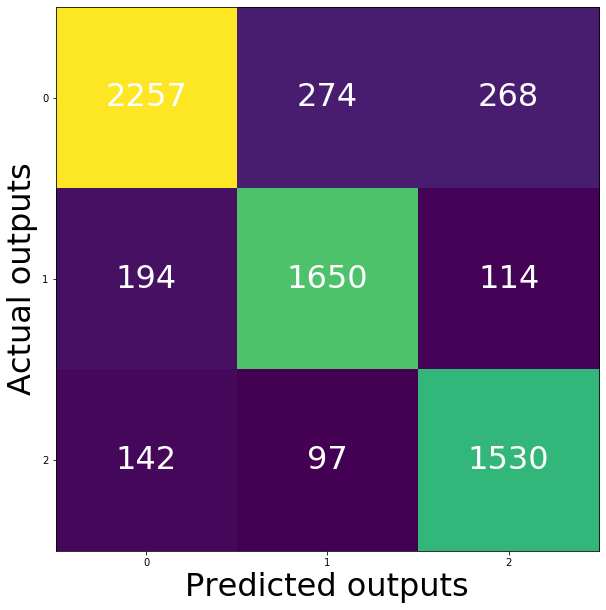

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm_mat)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=32, color='black')
ax.set_ylabel('Actual outputs', fontsize=32, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
#ax.set_ylim(5.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_mat[i][j], ha='center', va='center', color='white', fontsize=32)
plt.show()

# Challenge 8

Write a new accuracy function that accepts a list of list form and returns the accuracy. Note your function should work on matrices 2 or above.

In [0]:
def cmat_accuracy(cmat:list) -> float:
  assert isinstance(cmat, list), f'cmat not a list but instead a {type(cmat)}'
  assert all(len(row) == len(cmat) for row in cmat), f'cmat not a square matrix'

  #your code here
  dimension = len(cmat)
  hit = 0
  total = 0
  for i in range(dimension):
    for j in range(dimension):
      if i == j:
        hit += cmat[i][j]
      total += cmat[i][j]
  return (np.divide(hit, total))


In [0]:
cmat_accuracy(cm_mat)  #0.8331290223720502

0.8331290223720502

## Not bad

We got a fairly good score without too much effort. Our biggest chore was building the bag of words.

<h2>
Multinomial versus Bernoulli
</h2>
<div class=h1_cell>
<p>
We are using Multinomial Naive Bayes because we are counting how many times a word occurs for an author. We could also use Bernoulli Naive Bayes where we look for features that are true or false, e.g., a sentence is greater than 10 words in length. This paper discusses the difference between the two: http://www.kamalnigam.com/papers/multinomial-aaaiws98.pdf.
</div>

#Laplace was smooth

<img src='https://www.dropbox.com/s/1qjraurrneanzjo/Screenshot%202019-09-27%2013.47.01.png?raw=1'>

From his bio: <i>Laplace is remembered as one of the greatest scientists of all time. Sometimes referred to as the French Newton or Newton of France, he has been described as possessing a phenomenal natural mathematical faculty superior to that of any of his contemporaries. He was Napoleon's examiner when Napoleon attended the École Militaire in Paris in 1784. Laplace became a count of the Empire in 1806 and was named a marquis in 1817, after the Bourbon Restoration.
Laplace died in Paris in 1827. His brain was removed by his physician, François Magendie, and kept for many years, eventually being displayed in a roving anatomical museum in Britain. It was reportedly smaller than the average brain.</i>

Laplace was also into thought experiments. He was thinking about the probability that the sun would **not** rise in the morning.
His thought was that given a large sample of days with the rising sun, we still can not be completely sure that it will rise tomorrow. So the probability of it not rising is not zero, even though we have no evidence of it to date. He proposed adding a small smoothing constant to each conditional probability. In essence, he did not like probablities of 0. He thought a 0 led to us thinking we knew more than we actually did.

